In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Resample raster files

In [2]:
# import class to handle raster files
from gempy.utils import create_topography

#### example tif file

pass geo_model to automatically crop the DEM to the grid extent
depending on the size of the raster, this can take a while...
storing converted file...
raster extent:  [440720 471440  69280 100000]
 raster resolution: [512 512]
 Pixel X size 60.0, Pixel Y size -60.0


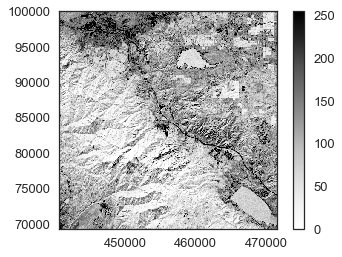

In [3]:
fp = os.pardir+"/data/input_data/tut-ch1-7/bogota.tif"
# create DEM_GDAL object
topo = create_topography.Load_DEM_GDAL(fp)
topo.info()

#### the same file, but as xyz

In [4]:
fpxyz = os.pardir+"/data/input_data/tut-ch1-7/bogota.xyz"
topo = create_topography.Load_DEM_GDAL(fpxyz)
topo.info()

AttributeError: Raster file could not be opened. Check if the filepath is correct. If yes,check if your file fits the requirements of GDALs raster file formats.

#### Resample grid to make it coarser

In [ ]:
save_path='bogota_coarse.tif' # define path
topo.resample(new_xres=300,new_yres=300, save_path=save_path)

In [ ]:
# open resampled raster file 
topo_res = create_topography.Load_DEM_GDAL(save_path)
topo_res.info()

#### Use resampled raster file in gempy model

In [ ]:
geo_model = gp.create_model('Single_layer_topo')

gp.init_data(geo_model, extent=[450000, 460000, 70000,80000,-1000,500],resolution = (50,50,50),
                         path_i = os.pardir+"/data/input_data/tut-ch1-7/onelayer_interfaces.csv",
                         path_o = os.pardir+"/data/input_data/tut-ch1-7/onelayer_orient.csv")
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

In [ ]:
geo_model.set_topography(source='gdal',filepath=save_path)

##### Note:
when setting a tiff with the set_topography function, the raster is automatically cropped to the extent of the geomodel (This is the reason why the resolution looks much lower)

#### Use xyz file in gempy model
all file formats that can be read by gempy can be found on https://gdal.org/drivers/raster/index.html